Universidad Galileo

Text Mining and Image Recognition

PAPD - Sección V

Sergio José Barrios Martínez

Carnet No. 19012765

# Laboratorio No. 3

## Clasificador Binario con Redes Neuronales Convolucionales

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import SGD
import matplotlib.pyplot as plt

## Modelo de Red Convolucional

Los filtros son los que detectan los patrones.
El kernel size es el tamaño del filtro. Los kernels son normalmente con números impares, porque se le quiere dar importancia al pixel del centro (desde el centro hacia afuera). En ese caso, el dataset de entrada consiste en un conjunto de imágenes de 64x64x3 (tomando en cuenta 3 canales).

## Arquitectura de Red Neuronal
Se utiliza Keras para definir la arquitectura. Estaremos utilizando una arquitectura conocida como VGG3 (con 3 capas convolucionales y de pooling) que funciona bastante bien para identificar patrones visuales.

In [ ]:
# Estructura Base
cnn = Sequential()

# Primera Capa Convolucional
cnn.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(64,64,3), activation='relu'))

# Capa de MaxPooling
cnn.add(MaxPooling2D(pool_size=(2,2)))

# Segunda Capa Convolucional
cnn.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(64,64,3), activation='relu'))

# Capa de MaxPooling
cnn.add(MaxPooling2D(pool_size=(2,2)))

# Tercera Capa Convolucional
cnn.add(Conv2D(filters=128, kernel_size=(3,3), input_shape=(64,64,3), activation='relu'))

# Capa de MaxPooling
cnn.add(MaxPooling2D(pool_size=(2,2)))

# Capa Flattening, para aplanar la capa antes de la NN
cnn.add(Flatten())

# Red neuronal Fully Connected (se recomiendan potencias de 2 las units)
cnn.add(Dense(units=128,activation='relu'))

# Capa de Salida, para clasificación binaria
cnn.add(Dense(units=1, activation = 'sigmoid'))

### Compilar la red
Aquí resolvemos el problema


In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
cnn.compile(optimizer=opt, loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
strDataTrain = '/content/drive/My Drive/Text Mining and Image Recognition/dataset/training_set'
strDataTest = '/content/drive/My Drive/Text Mining and Image Recognition/dataset/test_set'

### Pre-procesamiento de Datos

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Preprocesamiento para Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255.
)

# Configuración de Imagenes de Entrada para Train
train_set = train_datagen.flow_from_directory(
    strDataTrain,
    target_size=(64,64), #tiene que coincidir con la arquitectura del input shape a la red neuronal
    batch_size=32,
    class_mode='binary'
)

# Configuración de Imagenes de Entrada para Test
test_set = test_datagen.flow_from_directory(
    strDataTest,
    target_size=(64,64), #tiene que coincidir con la arquitectura del input shape a la red neuronal
    batch_size=32,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [6]:
historia = cnn.fit(train_set,
        steps_per_epoch = int(8000/32),
        epochs=45,
        validation_data=test_set,
        validation_steps=int(2000/32),
        verbose=1)

Epoch 1/45
250/250 [==============================] - 100s 399ms/step - loss: 0.6919 - accuracy: 0.5280 - val_loss: 0.6898 - val_accuracy: 0.5055
Epoch 2/45
250/250 [==============================] - 100s 400ms/step - loss: 0.6887 - accuracy: 0.5499 - val_loss: 0.6863 - val_accuracy: 0.6079
Epoch 3/45
250/250 [==============================] - 99s 396ms/step - loss: 0.6855 - accuracy: 0.5766 - val_loss: 0.6815 - val_accuracy: 0.6003
Epoch 4/45
250/250 [==============================] - 99s 396ms/step - loss: 0.6803 - accuracy: 0.5850 - val_loss: 0.6845 - val_accuracy: 0.5222
Epoch 5/45
250/250 [==============================] - 100s 400ms/step - loss: 0.6763 - accuracy: 0.5854 - val_loss: 0.6689 - val_accuracy: 0.6235
Epoch 6/45
250/250 [==============================] - 100s 401ms/step - loss: 0.6697 - accuracy: 0.6010 - val_loss: 0.6615 - val_accuracy: 0.6079
Epoch 7/45
250/250 [==============================] - 106s 423ms/step - loss: 0.6675 - accuracy: 0.5896 - val_loss: 0.6553 - v

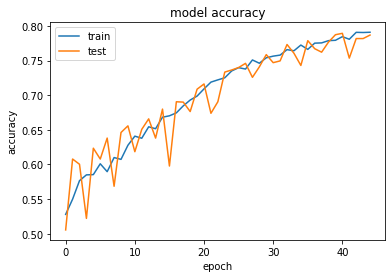

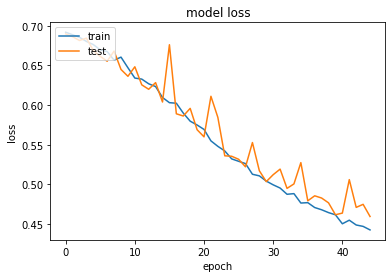

In [7]:
# Resumen de Precisión
plt.plot(historia.history['accuracy'])
plt.plot(historia.history['val_accuracy'])
plt.title('Precisión del Modelo')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Resumen de Función de Costo
plt.plot(historia.history['loss'])
plt.plot(historia.history['val_loss'])
plt.title('Costo del Modelo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Llegando casi a la precisión requerida, hacemos iteraciones adicionales para llegar al mínimo requerido:

In [8]:
historia = cnn.fit(train_set,
        steps_per_epoch = int(8000/32),
        epochs=10,
        validation_data=test_set,
        validation_steps=int(2000/32),
        verbose=1)

Epoch 1/10
250/250 [==============================] - 100s 401ms/step - loss: 0.4380 - accuracy: 0.7905 - val_loss: 0.4496 - val_accuracy: 0.7989
Epoch 2/10
250/250 [==============================] - 99s 395ms/step - loss: 0.4279 - accuracy: 0.8012 - val_loss: 0.4612 - val_accuracy: 0.7863
Epoch 3/10
250/250 [==============================] - 100s 398ms/step - loss: 0.4352 - accuracy: 0.7971 - val_loss: 0.4512 - val_accuracy: 0.7928
Epoch 4/10
250/250 [==============================] - 103s 411ms/step - loss: 0.4261 - accuracy: 0.8008 - val_loss: 0.4585 - val_accuracy: 0.7984
Epoch 5/10
250/250 [==============================] - 98s 393ms/step - loss: 0.4230 - accuracy: 0.8054 - val_loss: 0.4458 - val_accuracy: 0.7944
Epoch 6/10
250/250 [==============================] - 98s 393ms/step - loss: 0.4206 - accuracy: 0.8084 - val_loss: 0.4331 - val_accuracy: 0.8160
Epoch 7/10
250/250 [==============================] - 100s 398ms/step - loss: 0.4220 - accuracy: 0.8060 - val_loss: 0.4468 - va

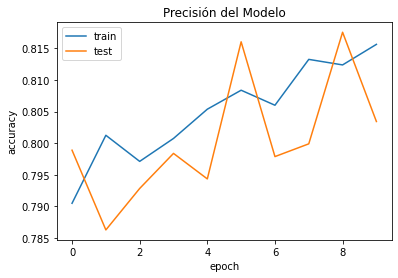

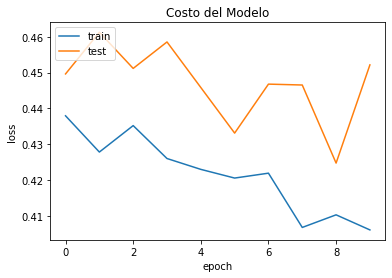

In [10]:
# Resumen de Precisión
plt.plot(historia.history['accuracy'])
plt.plot(historia.history['val_accuracy'])
plt.title('Precisión del Modelo')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Resumen de Función de Costo
plt.plot(historia.history['loss'])
plt.plot(historia.history['val_loss'])
plt.title('Costo del Modelo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()